### <center>THORIQ WIJAYA</center>
#### <center>F1D22320026</center>

# Modul 4

# Impor library yang akan digunakan

In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [26]:
def apply_3x3_mean_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            total_sum = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    total_sum += image[i + k, j + l]
            result[i, j] = total_sum // 9
            
    return result



Fungsi apply_3x3_mean_filter menerapkan filter rata-rata 3x3 pada citra grayscale. Ini dilakukan dengan menjalankan perulangan melalui setiap piksel dalam citra, kecuali tepi, dan menghitung nilai rata-rata intensitas piksel dalam lingkaran 3x3 di sekitar setiap piksel. Nilai rata-rata tersebut kemudian diatribusikan ke piksel yang sesuai dalam citra output. Proses ini menghasilkan citra yang telah diburamkan, dengan efek penyebaran rata-rata intensitas piksel di sekitar setiap titik dalam citra, menghasilkan efek pemulusan pada citra tersebut.

In [27]:
def apply_3x3_median_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighbors = []
            for k in range(-1, 2):
                for l in range(-1, 2):
                    neighbors.append(image[i + k, j + l])
            neighbors.sort()
            result[i, j] = neighbors[4]
            
    return result


Fungsi apply_3x3_median_filter melakukan proses filter median 3x3 pada citra grayscale. Saat memproses setiap piksel dalam citra, fungsi ini mengumpulkan nilai intensitas piksel dalam jendela 3x3 di sekitarnya ke dalam sebuah daftar. Daftar tersebut kemudian diurutkan, dan nilai tengahnya (median) diambil sebagai nilai intensitas piksel baru untuk piksel yang sedang diproses. Proses ini diulang untuk setiap piksel dalam citra, menghasilkan citra hasil yang telah dimodifikasi dengan efek penghalusan, sambil mempertahankan detail tepi yang tajam.

In [28]:
def apply_3x3_mode_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            count = np.zeros(256, dtype=int)
            for k in range(-1, 2):
                for l in range(-1, 2):
                    count[image[i + k, j + l]] += 1
            result[i, j] = np.argmax(count)
            
    return result


Fungsi apply_3x3_mode_filter menerapkan filter modus 3x3 pada citra grayscale. Dalam setiap iterasi, fungsi ini menghitung kemunculan nilai intensitas piksel dalam jendela 3x3 di sekitar setiap piksel citra. Nilai yang paling sering muncul (modus) diambil sebagai nilai piksel baru. Proses ini diulang untuk setiap piksel dalam citra, menghasilkan citra hasil yang lebih halus dengan nilai piksel yang mencerminkan nilai yang paling sering muncul di sekitarnya.

In [29]:
def apply_9x9_mean_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            total_sum = 0
            for k in range(-4, 5):
                for l in range(-4, 5):
                    total_sum += image[i + k, j + l]
            result[i, j] = total_sum // 81
            
    return result


Program tersebut adalah sebuah fungsi yang menerapkan filter rata-rata 9x9 pada gambar yang diberikan. Fungsi ini beroperasi dengan menjalankan nested loop untuk setiap pixel dalam gambar, di mana untuk setiap pixel, nilai rata-rata dari nilai piksel dalam kotak 9x9 di sekitarnya dihitung. Proses ini dilakukan dengan menjumlahkan nilai piksel dalam kotak 9x9 dan kemudian membaginya dengan jumlah piksel di dalam kotak tersebut, yaitu 81. Hasilnya adalah gambar yang telah disaring dengan filter rata-rata 9x9.

In [30]:
def apply_9x9_median_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            neighbors = []
            for k in range(-4, 5):
                for l in range(-4, 5):
                    neighbors.append(image[i + k, j + l])
            neighbors.sort()
            result[i, j] = neighbors[40]  
            
    return result


Program ini merupakan sebuah fungsi yang menerapkan filter median 9x9 pada gambar yang diberikan. Fungsi ini mirip dengan filter rata-rata, namun nilai piksel dalam kotak 9x9 diurutkan dan nilai median dari sekumpulan nilai piksel ini dipilih sebagai nilai piksel baru untuk posisi tengah. Proses ini dilakukan untuk setiap piksel dalam gambar, menghasilkan gambar yang telah difilter dengan filter median 9x9.

In [31]:
def apply_9x9_mode_filter(image):
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(4, height - 4):
        for j in range(4, width - 4):
            count = np.zeros(256, dtype=int)
            for k in range(-4, 5):
                for l in range(-4, 5):
                    count[image[i + k, j + l]] += 1
            result[i, j] = np.argmax(count) 
            
    return result


Program ini adalah sebuah fungsi yang menerapkan filter mode 9x9 pada gambar yang diberikan. Filter ini mengidentifikasi nilai piksel yang paling sering muncul di dalam kotak 9x9 di sekitar setiap piksel dalam gambar. Untuk setiap piksel, hitungan kemunculan dari setiap nilai piksel dalam kotak tersebut dihitung menggunakan array hitung, yang memiliki panjang 256 (mengasumsikan gambar dalam skala abu-abu dengan intensitas piksel dari 0 hingga 255). Nilai piksel yang paling sering muncul dihitung, dan piksel tersebut dijadikan sebagai nilai piksel baru untuk piksel di posisi tersebut dalam gambar hasil. Proses ini diulang untuk setiap piksel dalam gambar, menghasilkan gambar yang telah difilter dengan filter mode 9x9.

In [32]:
def penajamanCitra(image):
    
    kernel = np.array([[1/10, 1/10, 1/10],[1/10, 1/5, 1/10],[1/10, 1/10, 1/10]])
    
    height, width = image.shape
    
    sharpened_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            pixel_value = (kernel[0][0] * image[i-1][j-1] + kernel[0][1] * image[i-1][j] + kernel[0][2] * image[i-1][j+1] +
                           kernel[1][0] * image[i][j-1]   + kernel[1][1] * image[i][j]   + kernel[1][2] * image[i][j+1] +
                           kernel[2][0] * image[i+1][j-1] + kernel[2][1] * image[i+1][j] + kernel[2][2] * image[i+1][j+1])
            
            pixel_value = max(0, min(pixel_value, 255))
            
            sharpened_image[i][j] = pixel_value
            
    return sharpened_image

Program penjamanCitra(image) merupakan sebuah fungsi yang melakukan penajaman citra pada gambar grayscale. Dengan menggunakan sebuah kernel konvolusi, program ini meningkatkan ketajaman citra dengan mempertegas detail-detail yang ada. Setiap piksel dalam citra diproses dengan operasi konvolusi yang menggunakan kernel yang telah ditentukan sebelumnya. Hasil dari operasi konvolusi tersebut kemudian dibatasi agar tetap dalam rentang yang valid untuk citra grayscale. Citra hasil penajaman disimpan dalam sebuah matriks baru dengan ukuran yang sama dengan citra input, dan matriks tersebut dikembalikan sebagai output dari fungsi.

In [33]:
def penghalusan(image):
    
    kernel = np.array([[1/10, 1/10, 1/10],[1/10, 1/5, 1/10],[1/10, 1/10, 1/10]])
    
    height, width = image.shape
    
    smoothed_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            pixel_value = (kernel[0][0] * image[i-1][j-1] + kernel[0][1] * image[i-1][j] + kernel[0][2] * image[i-1][j+1] +
                           kernel[1][0] * image[i][j-1]   + kernel[1][1] * image[i][j]   + kernel[1][2] * image[i][j+1] +
                           kernel[2][0] * image[i+1][j-1] + kernel[2][1] * image[i+1][j] + kernel[2][2] * image[i+1][j+1])
            
            pixel_value = max(0, min(pixel_value, 255))
            
            smoothed_image[i][j] = pixel_value
            
    return smoothed_image



Program penghalusan(image) adalah fungsi yang melakukan penghalusan pada gambar grayscale menggunakan metode konvolusi dengan kernel tertentu. Dalam program ini, setiap piksel dalam citra diproses dengan mengambil rata-rata nilai piksel di sekitarnya dengan bobot yang telah ditentukan. Hasil dari proses tersebut kemudian dibatasi agar tetap dalam rentang valid untuk citra grayscale dan disimpan sebagai citra hasil penghalusan. Tujuan penghalusan ini adalah untuk mengurangi noise dan membuat transisi antar piksel menjadi lebih lembut, menghasilkan citra yang lebih halus secara visual.

In [34]:
gambar = cv.imread('../assets/manchester_united.jpeg', 0)

mean3 = apply_3x3_mean_filter(gambar)
median3 = apply_3x3_median_filter(gambar)
modus3 = apply_3x3_mode_filter(gambar)
mean9 = apply_9x9_mean_filter(gambar)
median9 = apply_9x9_median_filter(gambar)
modus9 = apply_9x9_mode_filter(gambar)
hslpenajaman = penajamanCitra(gambar)
hslpenghalusan = penghalusan(gambar)


Fungsi-fungsi di panggil menggunakan parameter image, dan disimpan kedalam sebuah variabel.

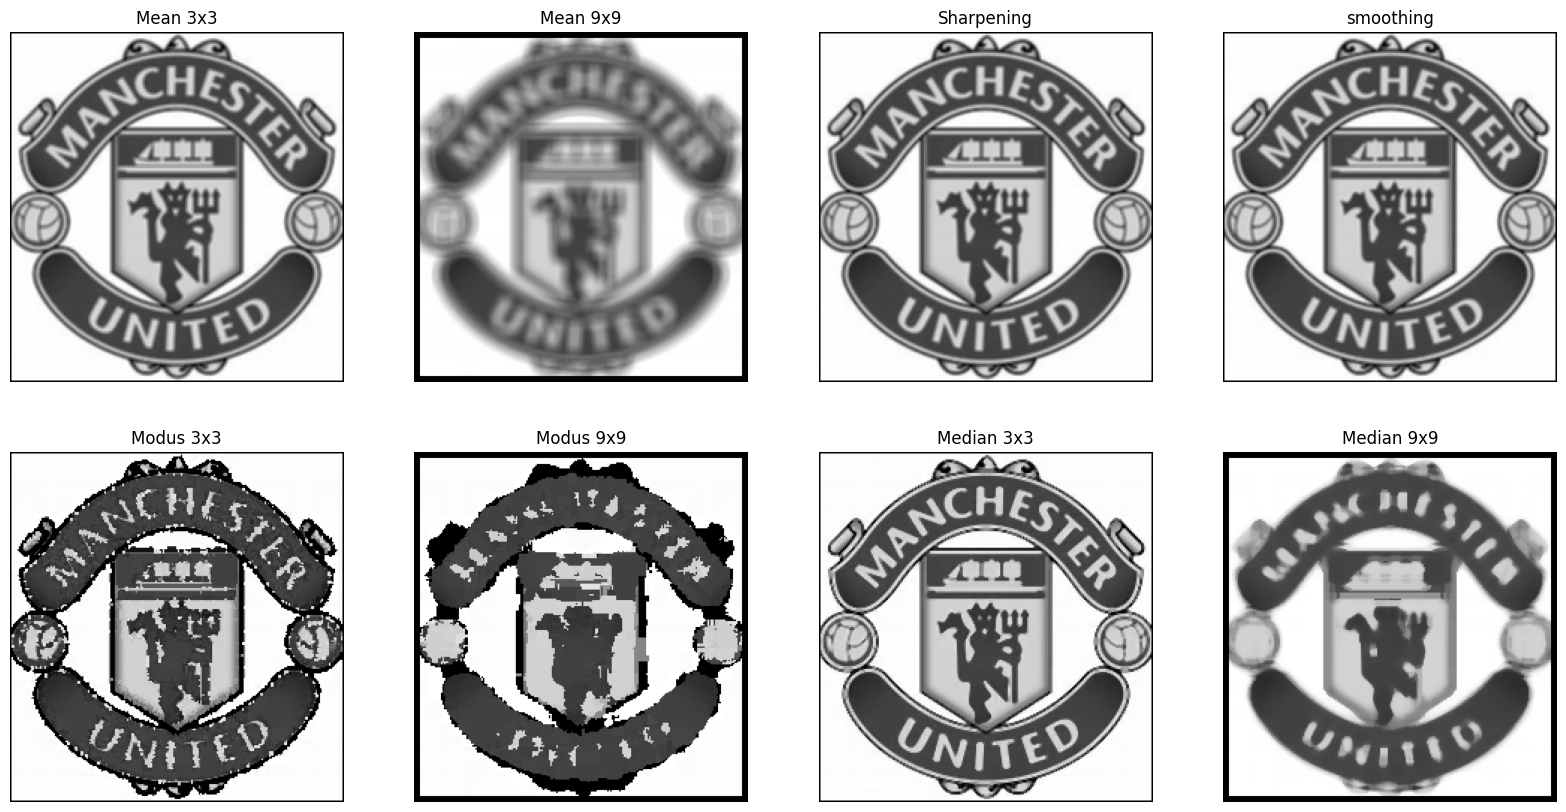

In [35]:

plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(mean3, cmap='gray')
plt.title('Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(mean9, cmap='gray')
plt.title('Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(hslpenajaman, cmap='gray')
plt.title('Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(hslpenghalusan, cmap='gray')
plt.title('smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(modus3, cmap='gray')
plt.title('Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(modus9, cmap='gray')
plt.title('Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(median3, cmap='gray')
plt.title('Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(median9, cmap='gray')
plt.title('Median 9x9')
plt.axis("off")

plt.show()

# Melakukan Deteksi Tepi

In [36]:
def prewitt(image):
    height, width = image.shape

    edges = np.zeros((height, width))
    prewitt_horizontal = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])

    prewitt_vertical = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    for i in range(1, height-1):
        for j in range(1, width-1):
            horizontal_gradient = (image[i-1, j-1] * prewitt_horizontal[0, 0] +
                                   image[i-1, j] * prewitt_horizontal[0, 1] +
                                   image[i-1, j+1] * prewitt_horizontal[0, 2] +
                                   image[i, j-1] * prewitt_horizontal[1, 0] +
                                   image[i, j] * prewitt_horizontal[1, 1] +
                                   image[i, j+1] * prewitt_horizontal[1, 2] +
                                   image[i+1, j-1] * prewitt_horizontal[2, 0] +
                                   image[i+1, j] * prewitt_horizontal[2, 1] +
                                   image[i+1, j+1] * prewitt_horizontal[2, 2])
            edges[i, j] = abs(horizontal_gradient)

    for i in range(1, height-1):
        for j in range(1, width-1):
            vertical_gradient = (image[i-1, j-1] * prewitt_vertical[0, 0] +
                                 image[i-1, j] * prewitt_vertical[0, 1] +
                                 image[i-1, j+1] * prewitt_vertical[0, 2] +
                                 image[i, j-1] * prewitt_vertical[1, 0] +
                                 image[i, j] * prewitt_vertical[1, 1] +
                                 image[i, j+1] * prewitt_vertical[1, 2] +
                                 image[i+1, j-1] * prewitt_vertical[2, 0] +
                                 image[i+1, j] * prewitt_vertical[2, 1] +
                                 image[i+1, j+1] * prewitt_vertical[2, 2])
            edges[i, j] = max(edges[i, j], abs(vertical_gradient))

    return edges


Program tersebut mengimplementasikan metode Prewitt untuk deteksi tepi dalam citra grayscale. Dengan menggunakan filter Prewitt horizontal dan vertikal, program melakukan konvolusi pada citra untuk menghitung gradien dalam arah horizontal dan vertikal. Kemudian, magnitudo gradien dihitung sebagai nilai absolut dari jumlah gradien horizontal dan vertikal, yang menghasilkan citra baru yang menyoroti tepi dengan intensitas yang tinggi.

In [37]:
meanprewitt3 = prewitt(mean3)
medianprewitt3 = prewitt(median3)
modusprewitt3 = prewitt(modus3)
meanprewitt9 = prewitt(mean9)
medianprewitt9 = prewitt(median9)
modusprewitt9 = prewitt(modus9)
penajamanprewitt = prewitt(hslpenajaman)
penghalusanprewitt = prewitt(hslpenghalusan)

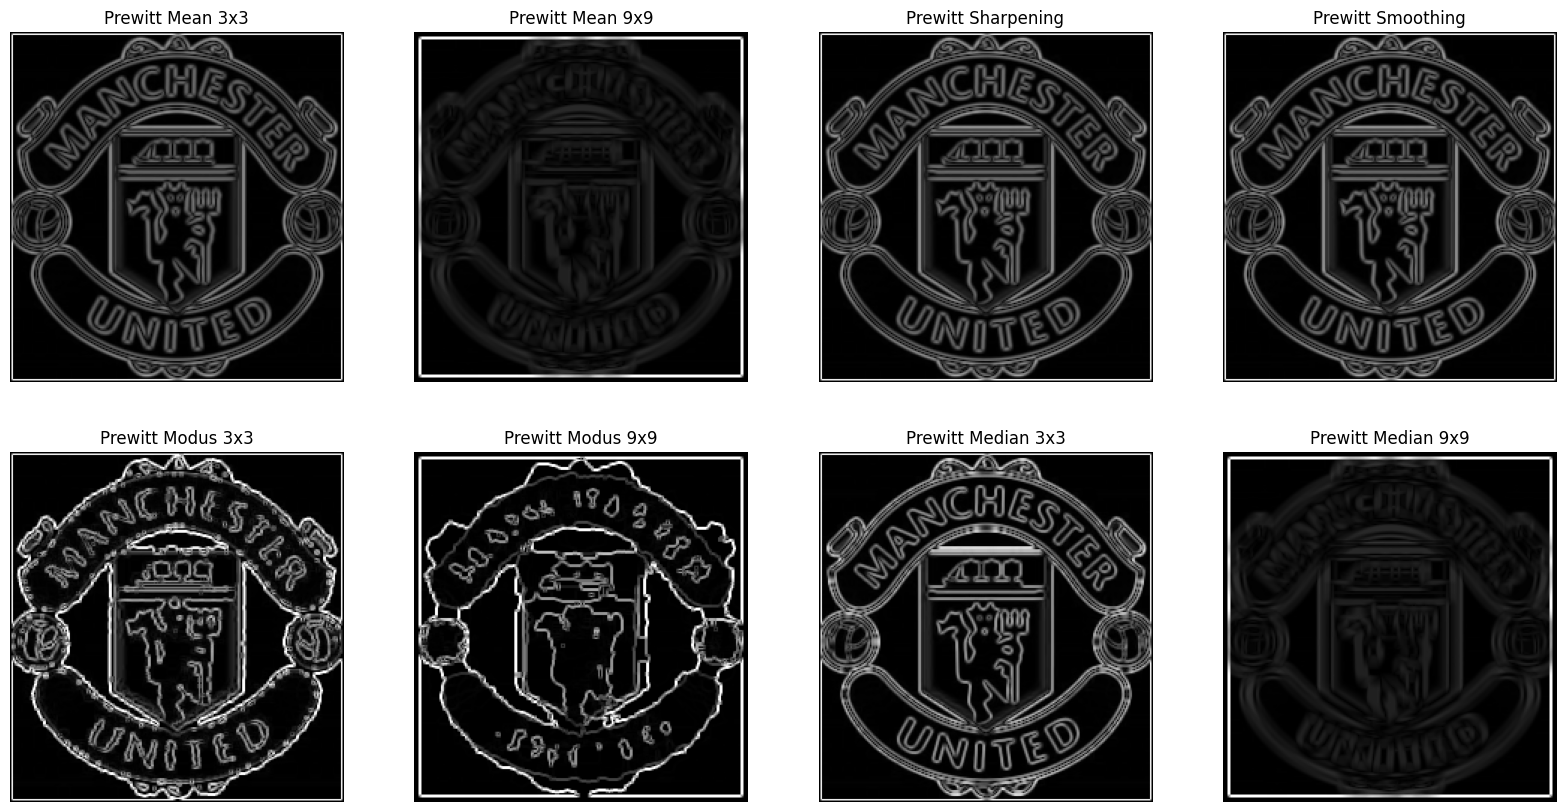

In [38]:
plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(meanprewitt3, cmap='gray')
plt.title('Prewitt Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(meanprewitt9, cmap='gray')
plt.title('Prewitt Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(penajamanprewitt, cmap='gray')
plt.title('Prewitt Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(penghalusanprewitt, cmap='gray')
plt.title('Prewitt Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(modusprewitt3, cmap='gray')
plt.title('Prewitt Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(modusprewitt9, cmap='gray')
plt.title('Prewitt Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(medianprewitt3, cmap='gray')
plt.title('Prewitt Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(meanprewitt9, cmap='gray')
plt.title('Prewitt Median 9x9')
plt.axis("off")

plt.show()

In [39]:
def sobel(image):
    height, width = image.shape

    edges = np.zeros((height, width))
    sobel_horizontal = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

    sobel_vertical = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])

    for i in range(1, height-1):
        for j in range(1, width-1):
            horizontal_gradient = (image[i-1, j-1] * sobel_horizontal[0, 0] +
                                   image[i-1, j] * sobel_horizontal[0, 1] +
                                   image[i-1, j+1] * sobel_horizontal[0, 2] +
                                   image[i, j-1] * sobel_horizontal[1, 0] +
                                   image[i, j] * sobel_horizontal[1, 1] +
                                   image[i, j+1] * sobel_horizontal[1, 2] +
                                   image[i+1, j-1] * sobel_horizontal[2, 0] +
                                   image[i+1, j] * sobel_horizontal[2, 1] +
                                   image[i+1, j+1] * sobel_horizontal[2, 2])
            edges[i, j] = abs(horizontal_gradient)

    for i in range(1, height-1):
        for j in range(1, width-1):
            vertical_gradient = (image[i-1, j-1] * sobel_vertical[0, 0] +
                                 image[i-1, j] * sobel_vertical[0, 1] +
                                 image[i-1, j+1] * sobel_vertical[0, 2] +
                                 image[i, j-1] * sobel_vertical[1, 0] +
                                 image[i, j] * sobel_vertical[1, 1] +
                                 image[i, j+1] * sobel_vertical[1, 2] +
                                 image[i+1, j-1] * sobel_vertical[2, 0] +
                                 image[i+1, j] * sobel_vertical[2, 1] +
                                 image[i+1, j+1] * sobel_vertical[2, 2])
            edges[i, j] = max(edges[i, j], abs(vertical_gradient))

    return edges


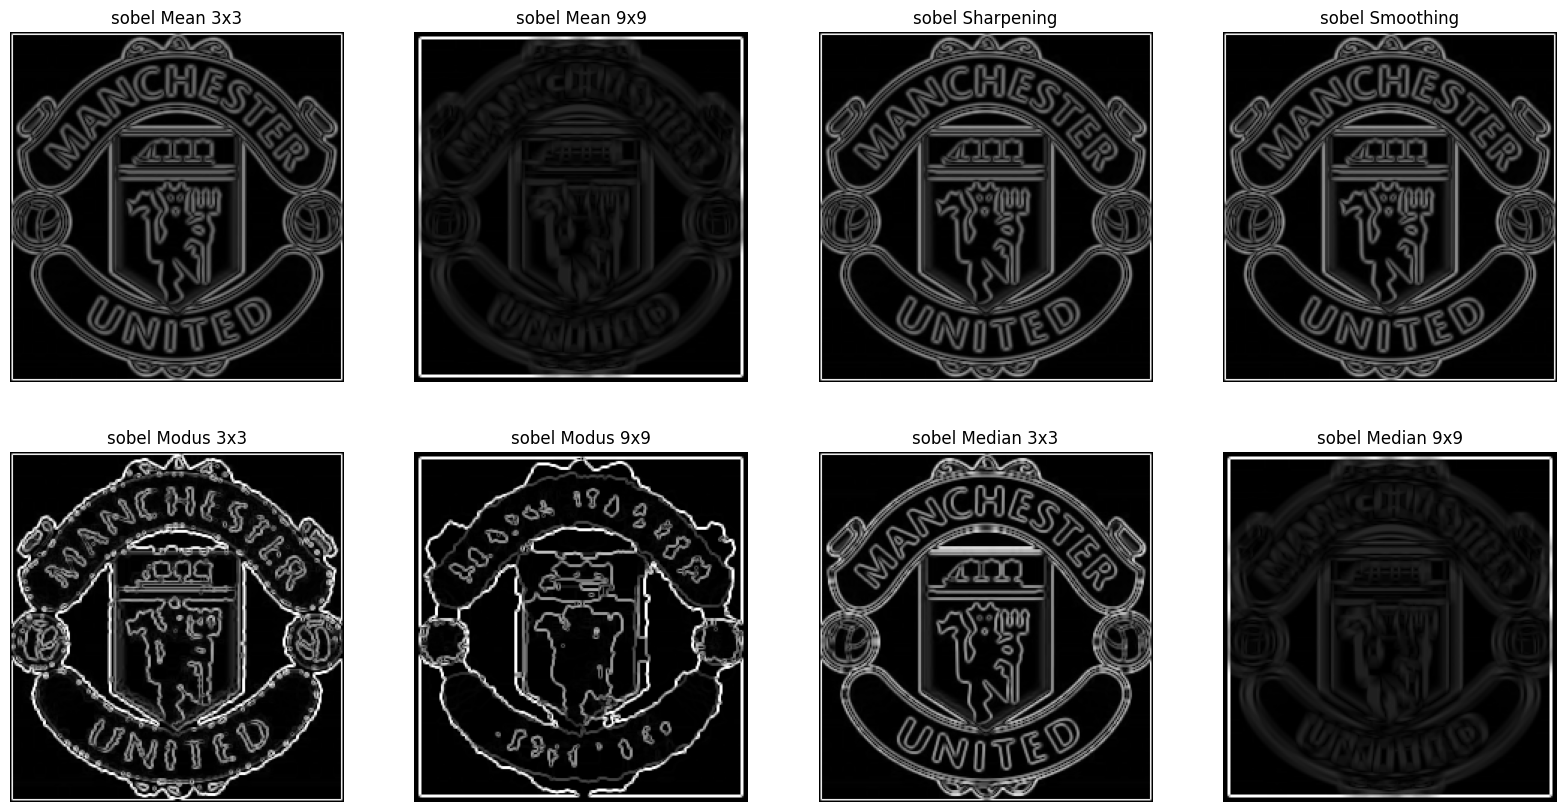

In [40]:
meansobel3 = sobel(mean3)
mediansobel3 = sobel(median3)
modussobel3 = sobel(modus3)
meansobel9 = sobel(mean9)
mediansobel9 = sobel(median9)
modussobel9 = sobel(modus9)
penajamansobel = sobel(hslpenajaman)
penghalusansobel = sobel(hslpenghalusan)


plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(meansobel3, cmap='gray')
plt.title('sobel Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(meansobel9, cmap='gray')
plt.title('sobel Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(penajamansobel, cmap='gray')
plt.title('sobel Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(penghalusansobel, cmap='gray')
plt.title('sobel Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(modussobel3, cmap='gray')
plt.title('sobel Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(modussobel9, cmap='gray')
plt.title('sobel Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(mediansobel3, cmap='gray')
plt.title('sobel Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(meansobel9, cmap='gray')
plt.title('sobel Median 9x9')
plt.axis("off")

plt.show()



In [41]:
def roberts(image):
    height, width = image.shape

    edges = np.zeros((height, width))

    roberts_horizontal = np.array([[1, 0],
                                [0, -1]])

    roberts_vertical = np.array([[0, 1],
                                [-1, 0]])

    for i in range(0, height-1):
        for j in range(0, width-1):
            horizontal_gradient = (image[i, j] * roberts_horizontal[0, 0] +
                                   image[i, j+1] * roberts_horizontal[0, 1] +
                                   image[i+1, j] * roberts_horizontal[1, 0] +
                                   image[i+1, j+1] * roberts_horizontal[1, 1])
            vertical_gradient = (image[i, j] * roberts_vertical[0, 0] +
                                 image[i, j+1] * roberts_vertical[0, 1] +
                                 image[i+1, j] * roberts_vertical[1, 0] +
                                 image[i+1, j+1] * roberts_vertical[1, 1])
            edges[i, j] = np.sqrt(horizontal_gradient**2 + vertical_gradient**2)

    return edges

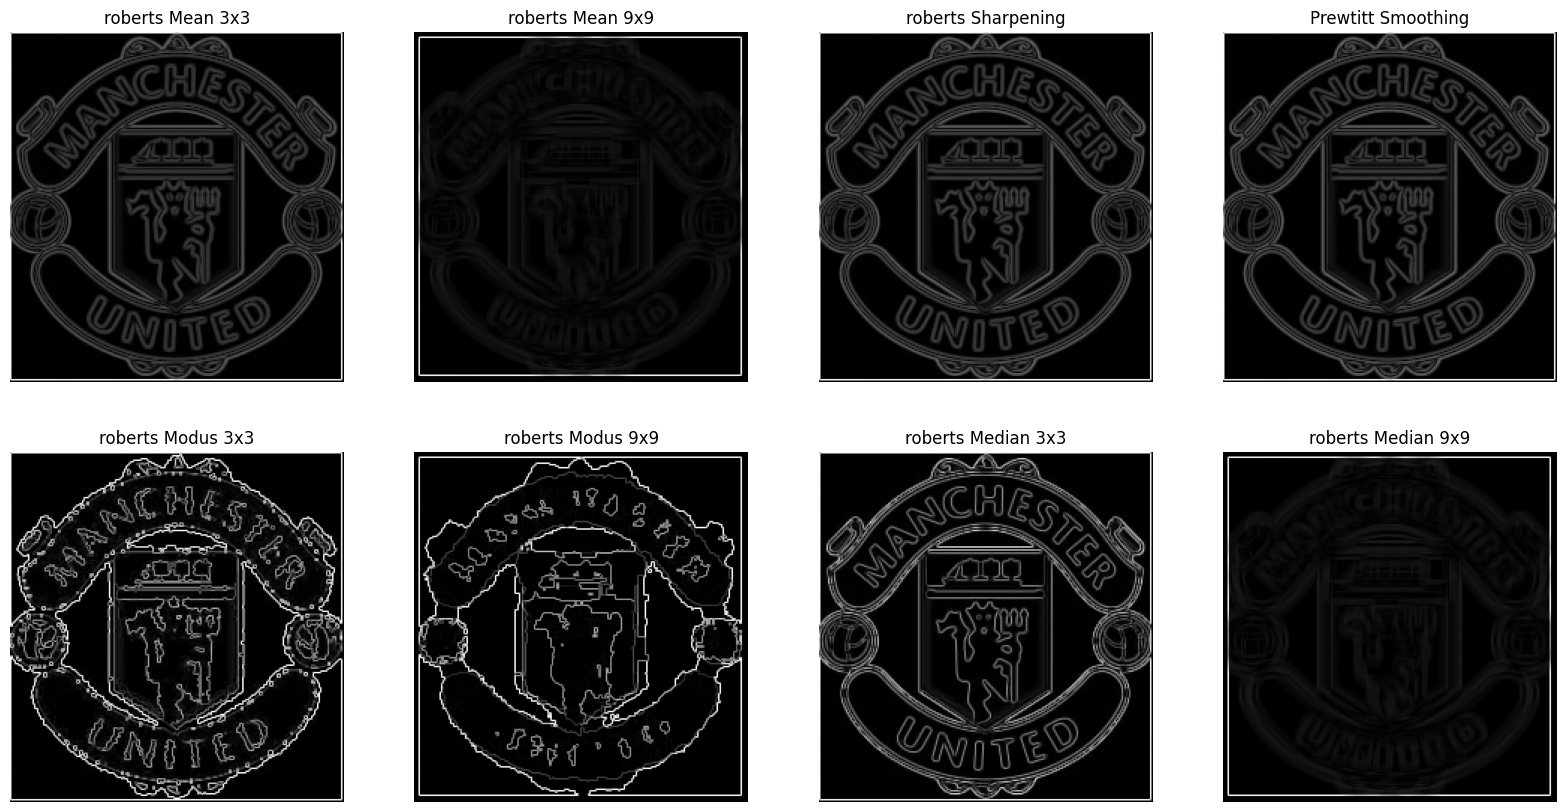

In [42]:
meanroberts3 = roberts(mean3)
medianroberts3 = roberts(median3)
modusroberts3 = roberts(modus3)
meanroberts9 = roberts(mean9)
medianroberts9 = roberts(median9)
modusroberts9 = roberts(modus9)
penajamanroberts = roberts(hslpenajaman)
penghalusanroberts = roberts(hslpenghalusan)


plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.imshow(meanroberts3, cmap='gray')
plt.title('roberts Mean 3x3')
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(meanroberts9, cmap='gray')
plt.title('roberts Mean 9x9')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(penajamanroberts, cmap='gray')
plt.title('roberts Sharpening')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(penghalusanroberts, cmap='gray')
plt.title('Prewtitt Smoothing')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(modusroberts3, cmap='gray')
plt.title('roberts Modus 3x3')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(modusroberts9, cmap='gray')
plt.title('roberts Modus 9x9')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(medianroberts3, cmap='gray')
plt.title('roberts Median 3x3')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(meanroberts9, cmap='gray')
plt.title('roberts Median 9x9')
plt.axis("off")

plt.show()

